In [7]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [10]:
data = pd.read_csv(r"Mall_Customers.csv")

Data Visualisation

1.Univariate Analysis

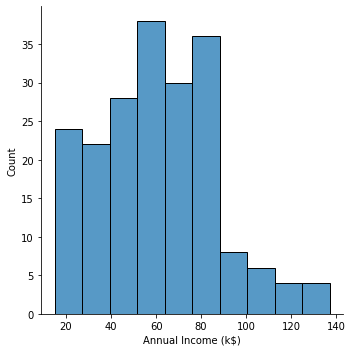

In [11]:
sns.displot(data['Annual Income (k$)'])

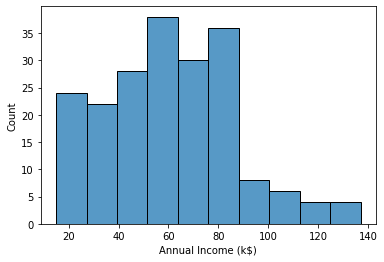

In [12]:
sns.histplot(data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


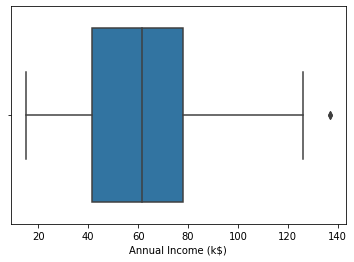

In [13]:
sns.boxplot(data['Annual Income (k$)'])

Bivariate Analaysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


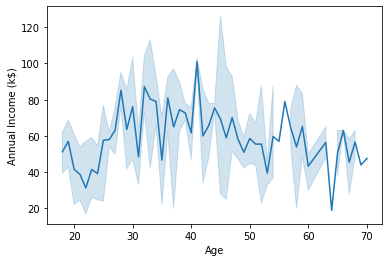

In [14]:
sns.lineplot(data['Age'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


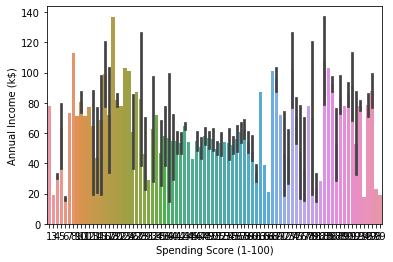

In [15]:
sns.barplot(data['Spending Score (1-100)'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


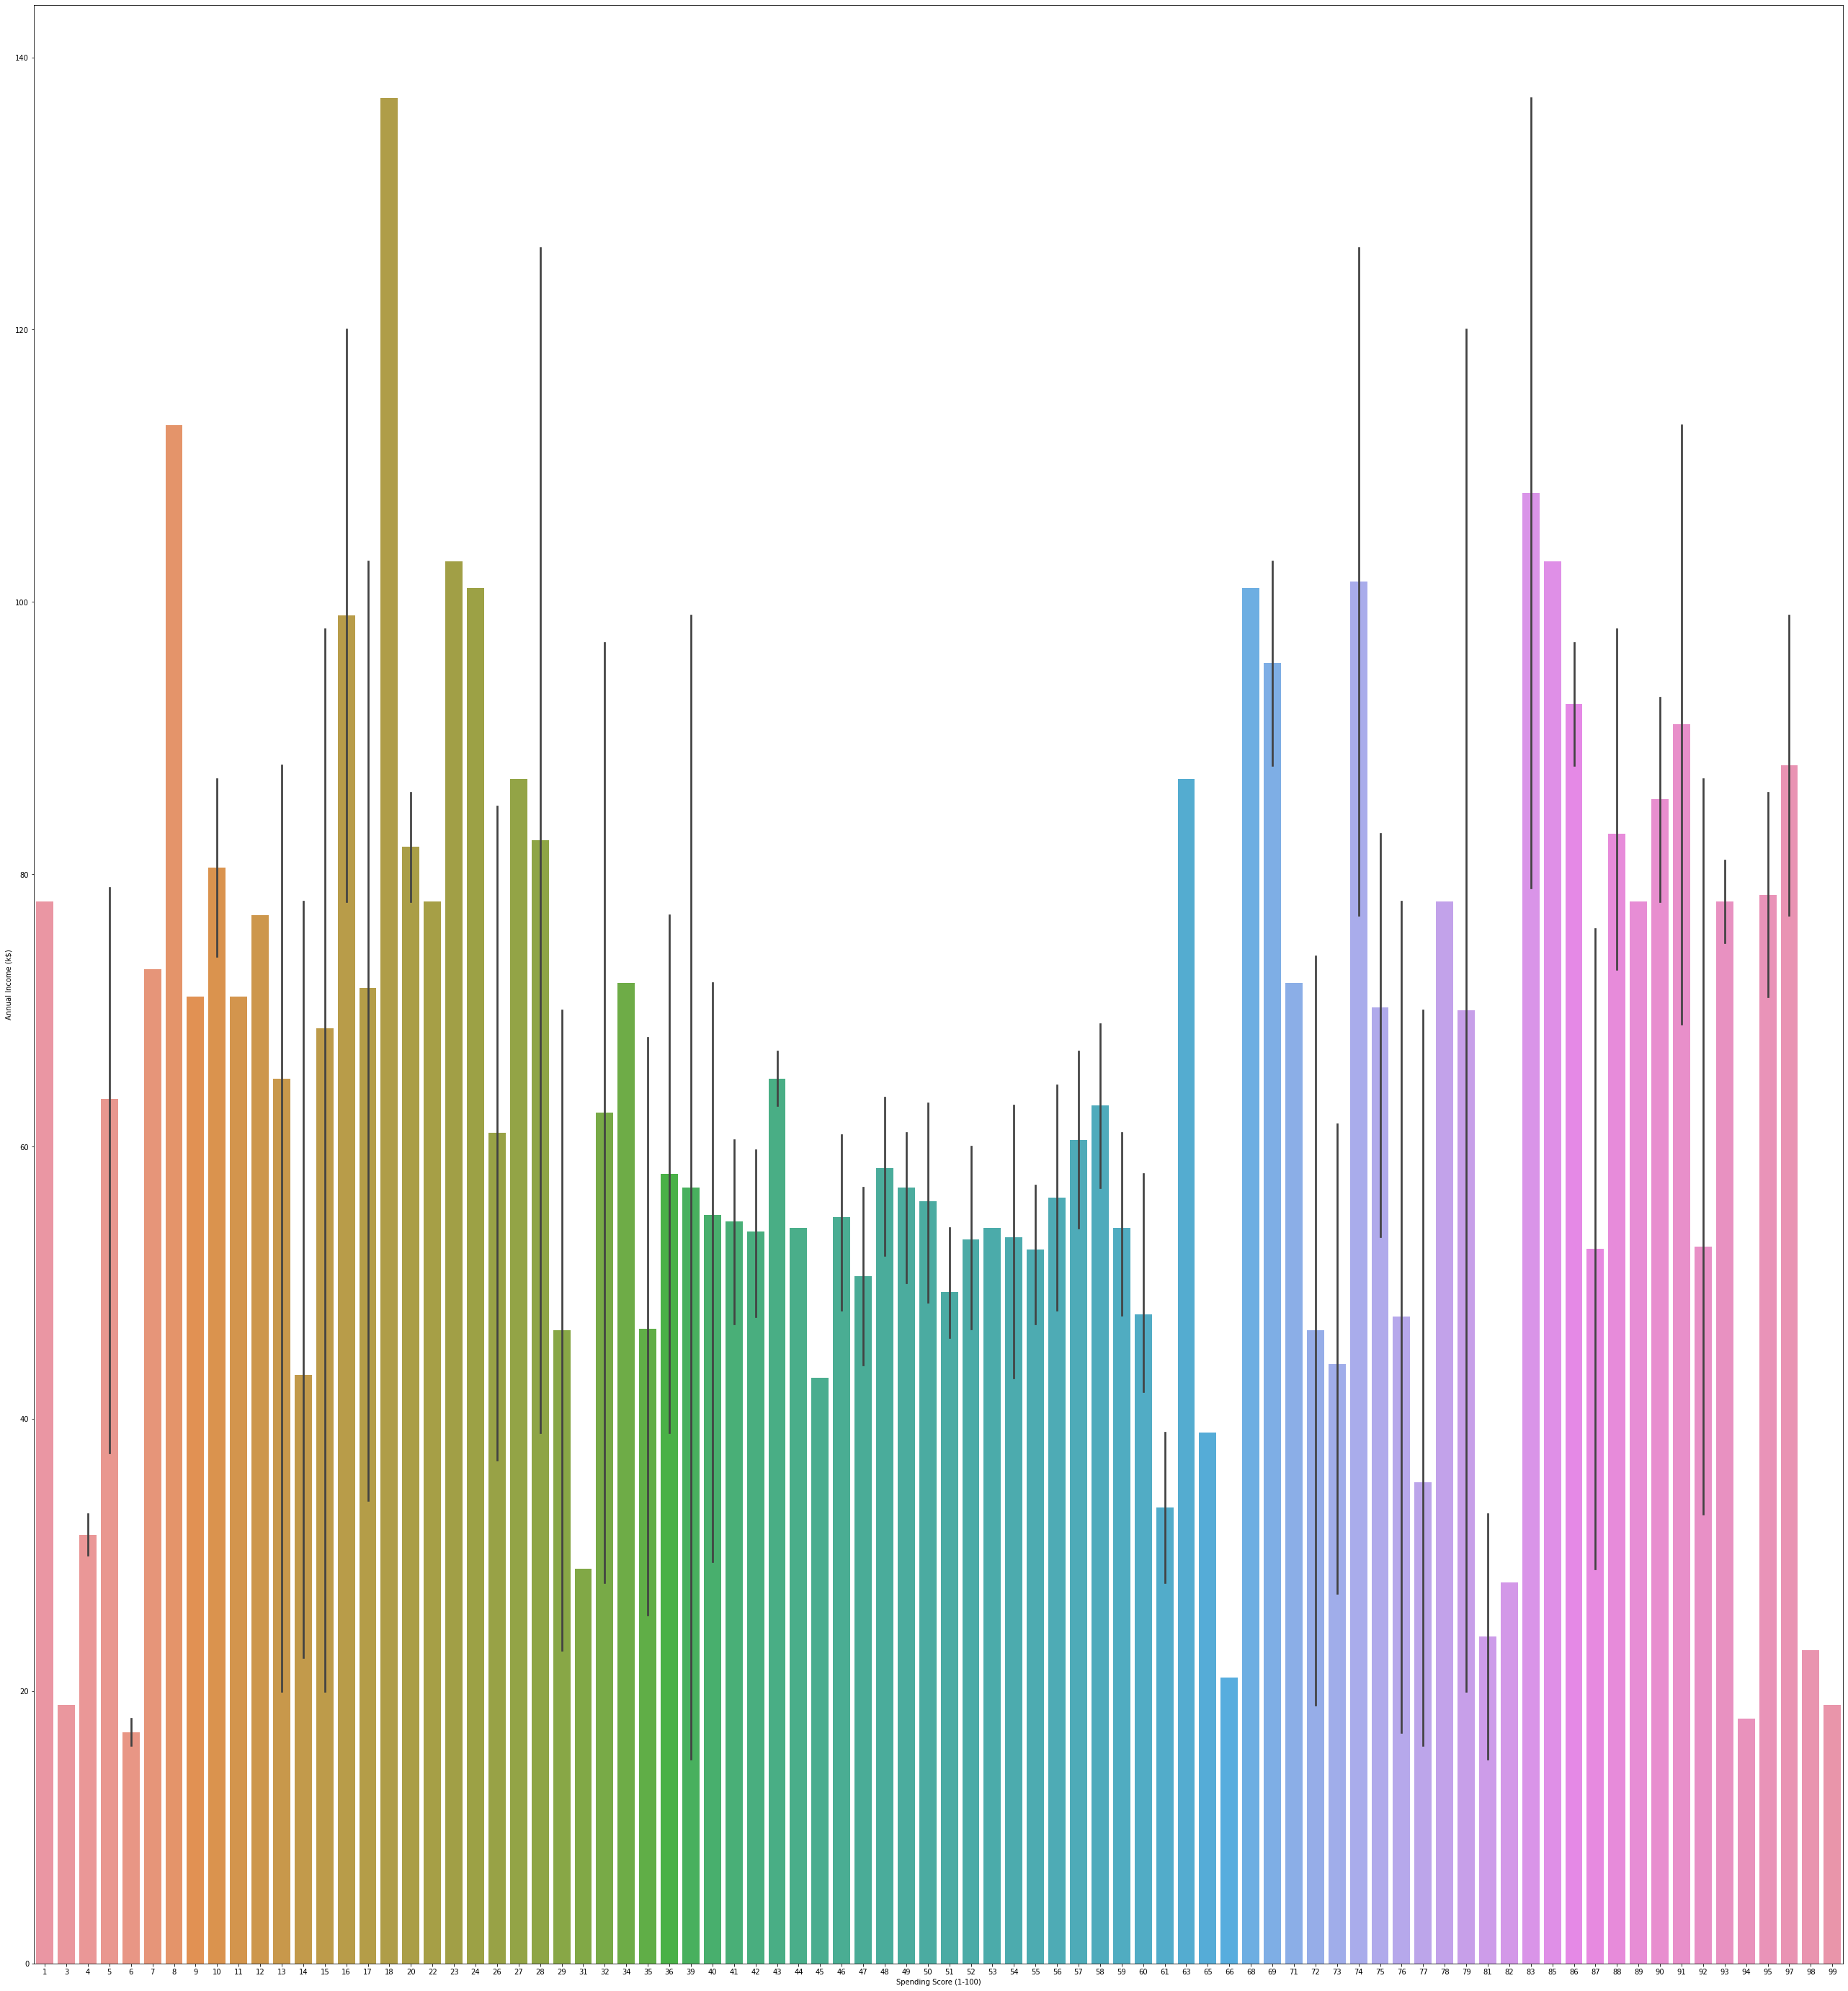

In [16]:
plt.figure(figsize=(45,50))
sns.barplot(data['Spending Score (1-100)'], data['Annual Income (k$)'])


Multi variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


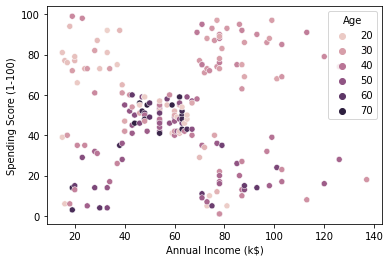

In [17]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue = data['Age'])

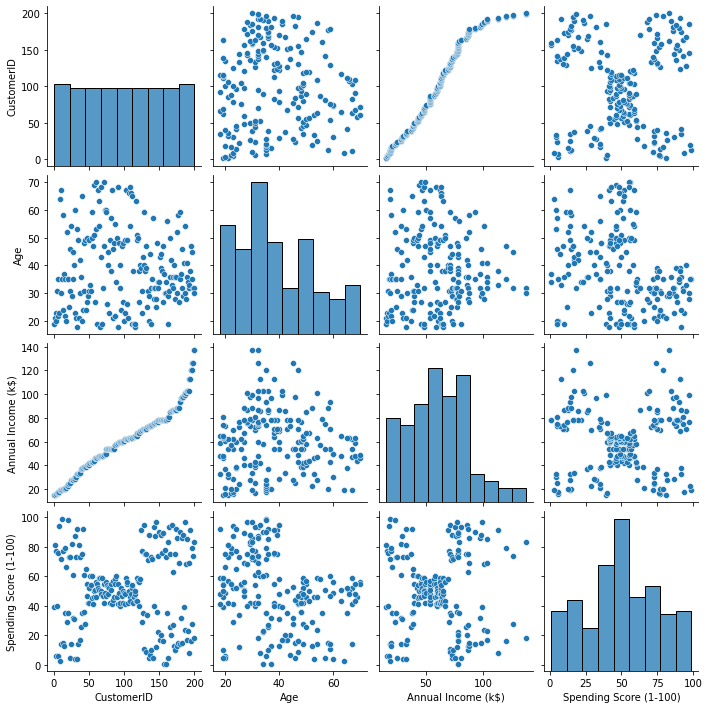

In [18]:
sns.pairplot(data)

descriptive Statistics

In [32]:
data.mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [33]:
data.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [34]:
data['Age'].mode()

0    32
dtype: int64

In [35]:
data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [36]:
data.std(numeric_only=True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [37]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [39]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


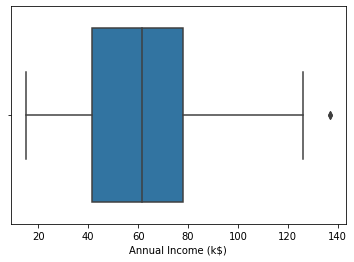

In [40]:
sns.boxplot(data['Annual Income (k$)'])

In [41]:
q = data.quantile([0.75,0.25])

In [42]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [43]:
iqr =  q.iloc[0] - q.iloc[1] 

In [44]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [45]:
u = q.iloc[0] + (1.5*iqr) 

In [46]:
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [47]:
l = q.iloc[1] - (1.5*iqr) 

In [48]:
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [49]:
data['Annual Income (k$)'] = np.where(np.logical_or(data['Annual Income (k$)']>132.75,data['Annual Income (k$)']<-13.250), 61.5,data['Annual Income (k$)'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


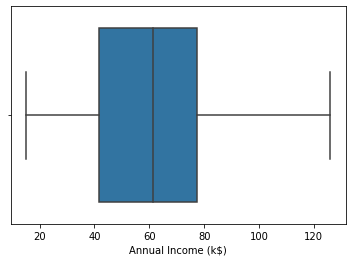

In [50]:
sns.boxplot(data['Annual Income (k$)'])

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) 

In [51]:
data.head()

scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(data)

In [53]:
x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [54]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster = KM.fit_predict(x_scaled)

In [55]:
cluster

array([4, 4, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 4, 0, 4, 1, 0, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 0, 1, 0, 1, 4, 2, 0, 2, 0, 2, 0, 2, 4, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 4, 0, 1, 2, 1, 2, 1, 0, 1, 1, 4, 2, 2, 1, 4,
       2, 2, 4, 0, 1, 2, 2, 2, 1, 4, 2, 1, 0, 2, 1, 4, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 4, 1, 2, 0, 4, 2, 0, 1, 4, 0, 2, 1, 4, 1, 0, 2, 1, 1, 1,
       1, 0, 2, 4, 0, 0, 2, 2, 2, 2, 6, 5, 3, 6, 5, 3, 7, 6, 7, 6, 7, 6,
       5, 3, 7, 3, 5, 6, 7, 3, 5, 6, 5, 3, 7, 6, 7, 3, 5, 6, 7, 6, 5, 3,
       5, 3, 7, 3, 7, 3, 5, 3, 7, 3, 7, 3, 7, 3, 5, 6, 7, 6, 7, 6, 5, 3,
       7, 6, 7, 6, 5, 3, 7, 3, 5, 6, 5, 6, 5, 3, 5, 3, 7, 3, 5, 3, 5, 6,
       7, 6], dtype=int32)

In [56]:
value = data.columns

In [57]:
value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [58]:
data1 = pd.DataFrame(x_scaled, columns = value)

In [59]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [60]:
data1['Cluster_value'] = pd.Series(cluster)

In [61]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,4
1,0.005025,1.0,0.057692,0.000000,0.816327,4
2,0.010050,0.0,0.038462,0.009009,0.051020,0
3,0.015075,0.0,0.096154,0.009009,0.775510,0
4,0.020101,0.0,0.250000,0.018018,0.397959,0


split the data in X and Y

In [62]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)
x = data1
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


In [63]:
y

0      4
1      4
2      0
3      0
4      0
      ..
195    3
196    5
197    6
198    7
199    6
Name: Cluster_value, Length: 200, dtype: int32

Split x and y into Training and Testing

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [65]:
x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [66]:
x_train.shape

(140, 5)

In [67]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [68]:
y_train

131    6
96     2
181    3
19     0
153    3
      ..
67     2
192    7
117    2
47     0
172    7
Name: Cluster_value, Length: 140, dtype: int32

In [69]:
y_test

18     1
170    7
107    1
98     1
177    6
182    7
5      0
146    7
12     2
152    5
61     4
125    3
180    5
154    5
80     1
7      0
33     4
130    7
37     0
74     1
183    3
145    6
45     0
159    3
60     1
123    6
179    6
185    6
122    3
44     2
16     0
55     1
150    7
111    0
22     2
189    3
129    6
4      0
83     2
106    2
134    7
66     2
26     2
113    4
168    5
63     2
8      1
75     4
118    2
143    3
71     2
124    5
184    5
97     0
149    6
24     2
30     1
160    5
40     2
56     2
Name: Cluster_value, dtype: int32

Building the Model

Multi linear regression model

In [71]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [72]:
pred = mlr.predict(x_test)

In [73]:
pred

array([ 2.19722514,  6.44468475,  3.93022364,  3.9122464 ,  6.07636753,
        6.39979942, -0.11670792,  5.25444441,  0.06452509,  3.74741737,
        3.61133359,  2.4323964 ,  4.25567899,  3.79659746,  3.06332222,
       -0.40402093,  2.37135079,  5.33885369,  0.39799709,  2.87578548,
        3.61407368,  4.75586212,  0.85797989,  3.4796382 ,  2.12473591,
        3.99292312,  5.45419308,  5.54501921,  2.42177481,  0.74470127,
        0.4857574 ,  2.92537557,  5.8264249 ,  2.8471905 ,  0.79347639,
        3.55730548,  4.44607993,  0.20385151,  1.52411807,  1.42515815,
        6.25578667,  1.07516253,  0.43338557,  5.09303435,  4.18854872,
        0.53594288,  2.05369554,  3.72040919,  2.27600846,  2.70093787,
        1.24120177,  3.43422648,  4.11384133,  2.29106292,  4.81558614,
        0.41723855,  2.63847427,  3.39950871,  0.0652586 ,  0.6057819 ])

In [74]:
y_test

18     1
170    7
107    1
98     1
177    6
182    7
5      0
146    7
12     2
152    5
61     4
125    3
180    5
154    5
80     1
7      0
33     4
130    7
37     0
74     1
183    3
145    6
45     0
159    3
60     1
123    6
179    6
185    6
122    3
44     2
16     0
55     1
150    7
111    0
22     2
189    3
129    6
4      0
83     2
106    2
134    7
66     2
26     2
113    4
168    5
63     2
8      1
75     4
118    2
143    3
71     2
124    5
184    5
97     0
149    6
24     2
30     1
160    5
40     2
56     2
Name: Cluster_value, dtype: int32

Performance metrics

In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [76]:
mse= mean_squared_error(y_test,pred)
mse

1.7576410604468158

In [77]:
rmse = np.sqrt(mse)
rmse

1.3257605592439443

In [78]:
r2_score(y_test,pred)

0.6608325569463691